In [271]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV


%matplotlib inline
plt.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings('ignore')

In [272]:
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')
traintoshow =pd.read_csv('data/train.csv')
testtoshow =pd.read_csv('data/test.csv')
trainforRan = pd.read_csv('data/train.csv')
testforRan = pd.read_csv('data/test.csv')
train3 = pd.read_csv('data/train.csv')
test3 = pd.read_csv('data/test.csv')

In [178]:
#데이터의 형상
train.shape

(1459, 11)

In [179]:
test.shape

(715, 10)

In [180]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [181]:
#데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [37]:
#기술통계
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [38]:
test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


In [55]:
#결측치 확인 및 결측치 수 파악
print(train.isnull())
print(train.isnull().sum())

         id   hour  hour_bef_temperature  hour_bef_precipitation  \
0     False  False                 False                   False   
1     False  False                 False                   False   
2     False  False                 False                   False   
3     False  False                 False                   False   
4     False  False                 False                   False   
...     ...    ...                   ...                     ...   
1454  False  False                 False                   False   
1455  False  False                 False                   False   
1456  False  False                 False                   False   
1457  False  False                 False                   False   
1458  False  False                 False                   False   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
0                  False              False                False   
1                  False              False    

In [40]:
#결측치를 제거하거나 0또는 인자값 으로 대체 가능
train = train.dropna()
test = test.fillna(0)

print(train.isnull().sum())
print(test.isnull().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64
id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64


In [41]:
# 제외할 컬럼명 count를 X에 넣고 예측할 값인 count을 Y에 넣어줍니다.
X_train = train.drop(['count'], axis=1)
Y_train = train['count']
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [43]:
#테스트파일을 훈련된 모델로 5개까지 예측해봅니다
pred = model.predict(test)
pred[:5]

array([117., 164., 114.,  49.,  64.])

In [53]:
# submission 변수에 submission.csv를 불러온 뒤 submission 파일의 count 피처에 예측결과를 할당한 뒤 sub.csv 제출파일으로 생성합니다.
submission = pd.read_csv('data/submission.csv')
submission['count'] = pred
submission.to_csv('sub.csv',index=False)

In [45]:
#각 피처의 결측치를 해당하는 피처들의 평균값으로 대체 합니다. interpolate는 보간법을 사용하여
#이전행과 다음행의 평균으로 보간 하는 방법입니다.
train.fillna({'hour_bef_temperature':int(train['hour_bef_temperature'].mean())}, inplace=True)
train.fillna({'hour_bef_precipitation':int(train['hour_bef_precipitation'].mean())}, inplace=True)
train.fillna({'hour_bef_windspeed':int(train['hour_bef_windspeed'].mean())}, inplace=True)
train.fillna({'hour_bef_humidity':int(train['hour_bef_humidity'].mean())}, inplace=True)
train.fillna({'hour_bef_visibility':int(train['hour_bef_visibility'].mean())}, inplace=True)
train.fillna({'hour_bef_ozone':int(train['hour_bef_ozone'].mean())}, inplace=True)
train.fillna({'hour_bef_pm10':int(train['hour_bef_pm10'].mean())}, inplace=True)
train.fillna({'hour_bef_pm2.5':int(train['hour_bef_pm2.5'].mean())}, inplace=True)

#train.interpolate(inplace=True)

In [46]:
print(train.isnull().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64


<AxesSubplot:>

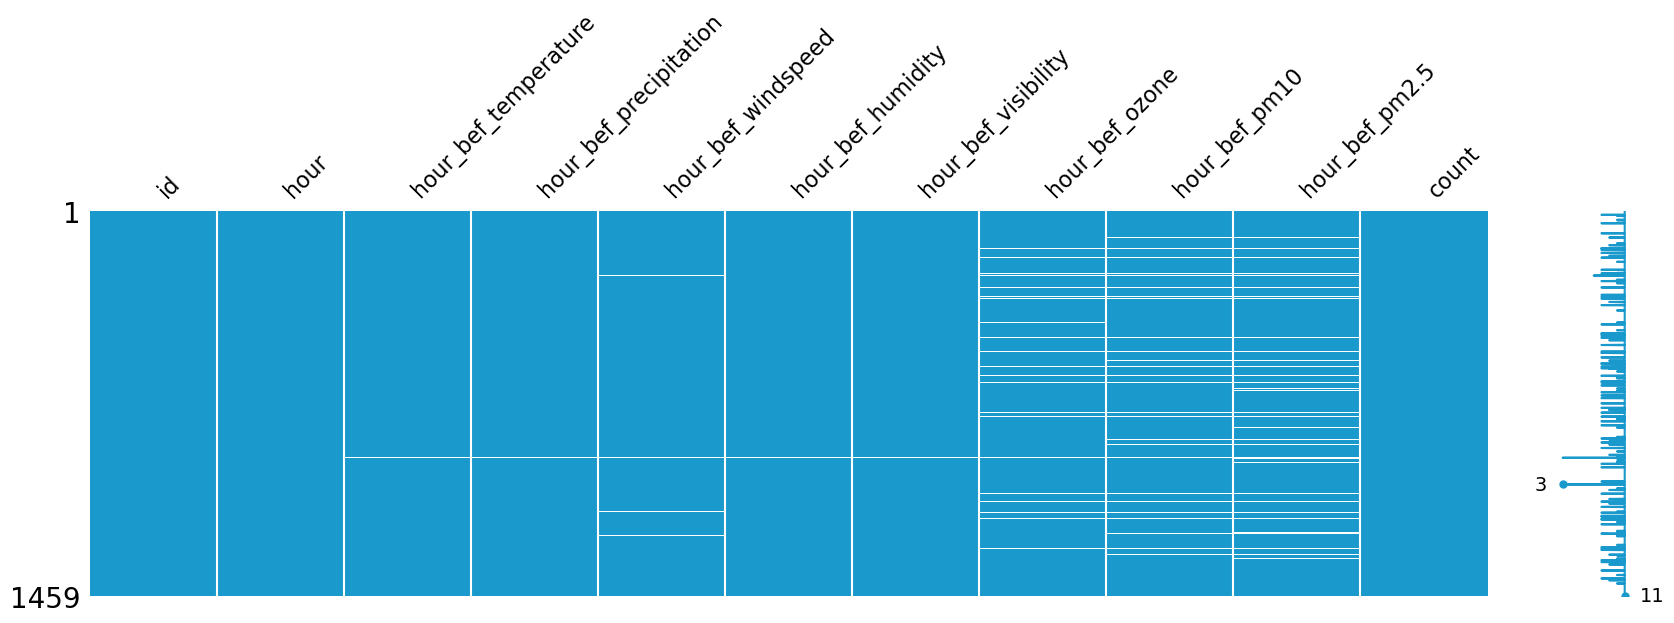

In [74]:
#결측치 시각화를 위해 missingno 라이브러리의 매트릭스를 통해 살펴보았습니다.(train)
msno.matrix(traintoshow, figsize=(20,5) ,color=(0.1, 0.6, 0.8))

<AxesSubplot:>

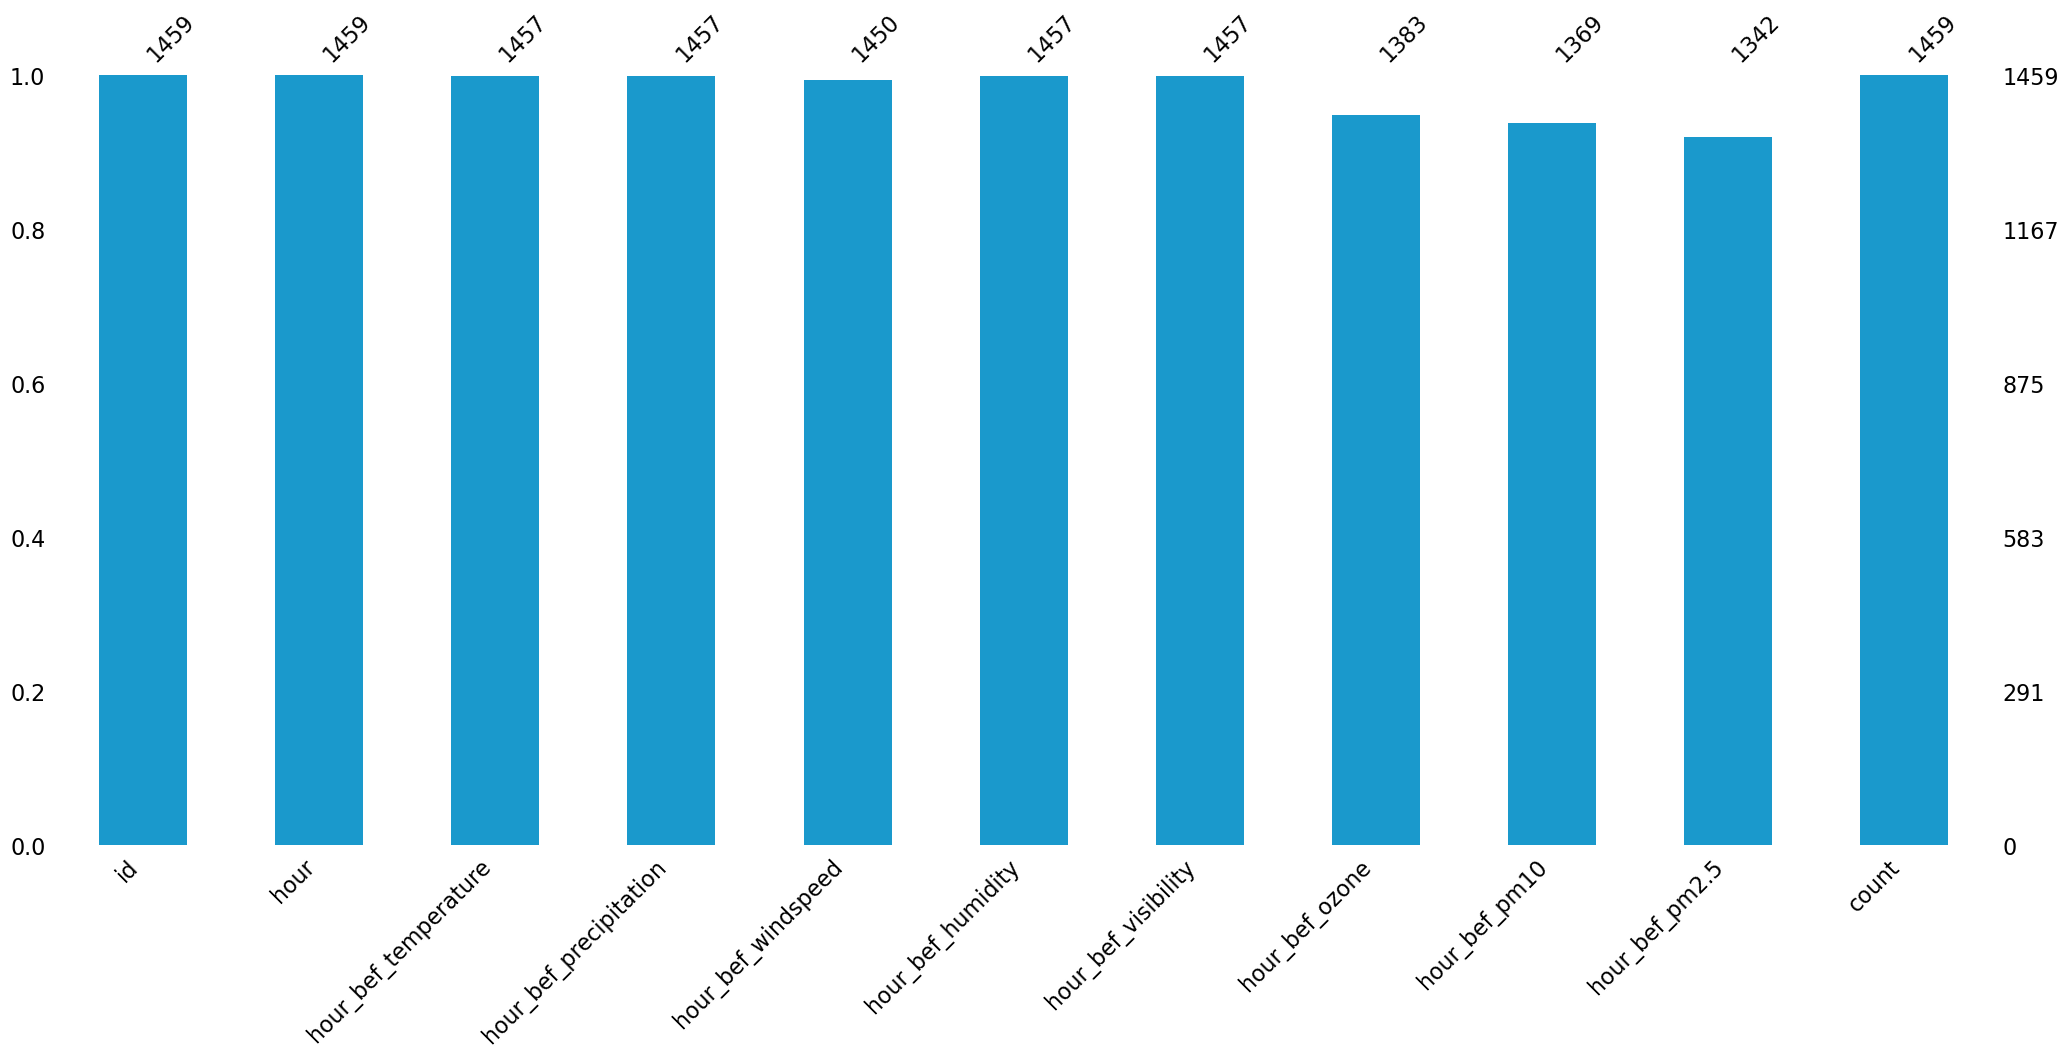

In [80]:
#바 차트로도 살펴보았습니다.(수치적으로 편하게 볼 수 있다는 장점이 있는것 같습니다.)
msno.bar(traintoshow,color=(0.1, 0.6, 0.8))

<AxesSubplot:>

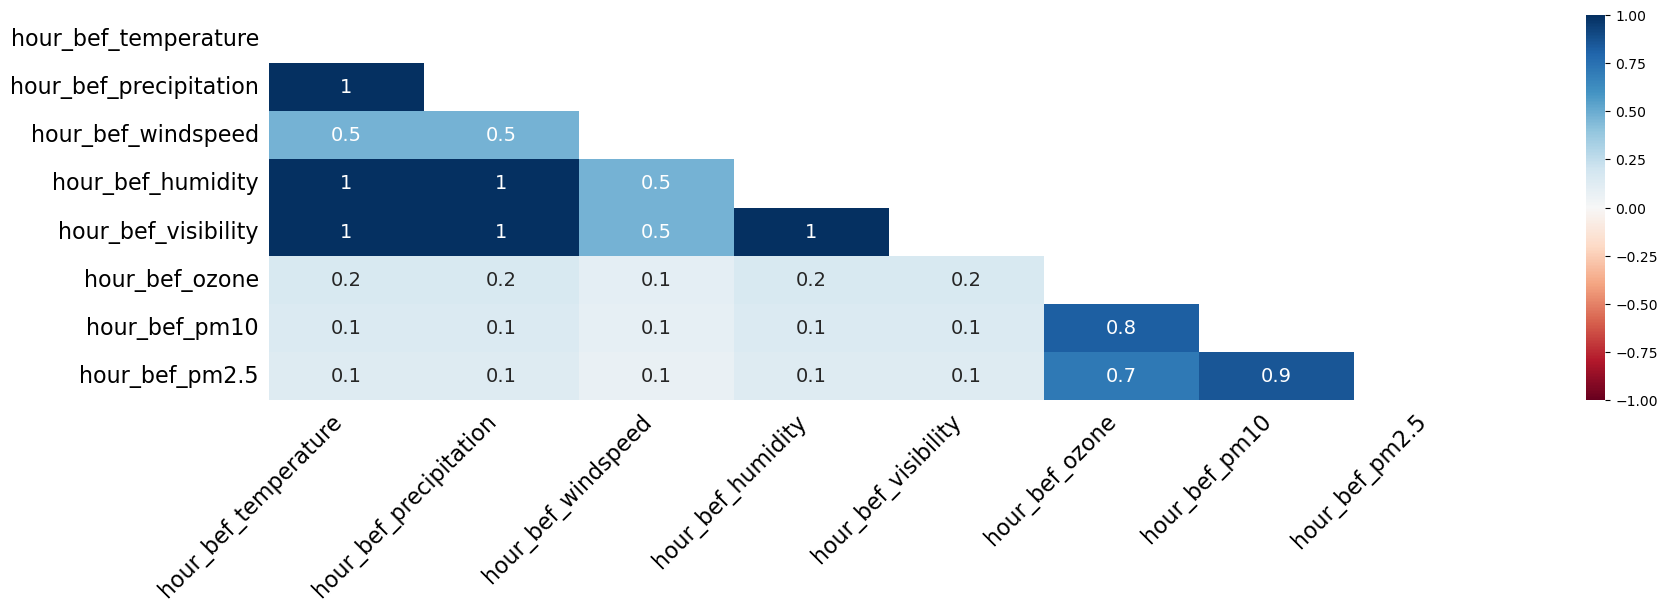

In [84]:
#히트맵을 통한 결측치 확인
msno.heatmap(traintoshow, figsize=(20,5))

<AxesSubplot:>

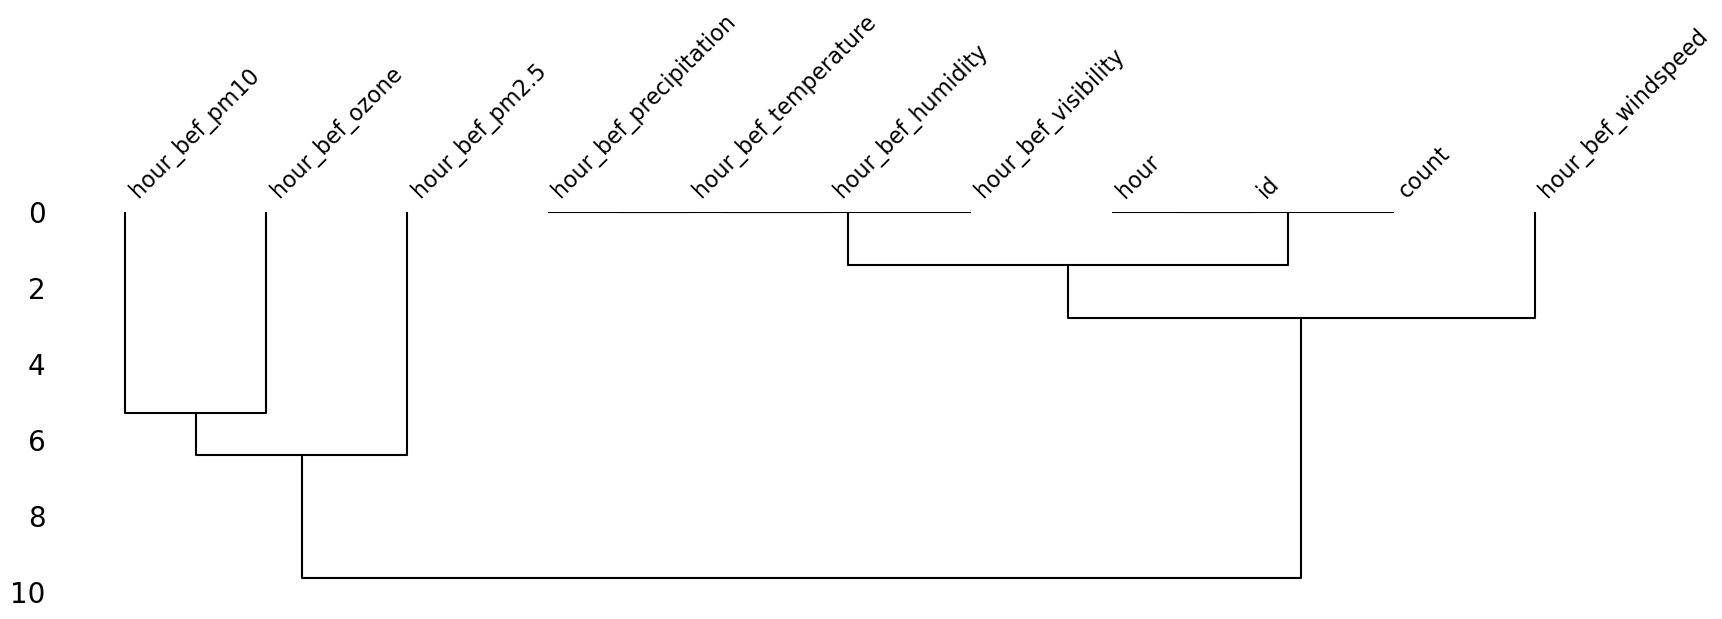

In [85]:
msno.dendrogram(traintoshow, figsize=(20,5))

<AxesSubplot:>

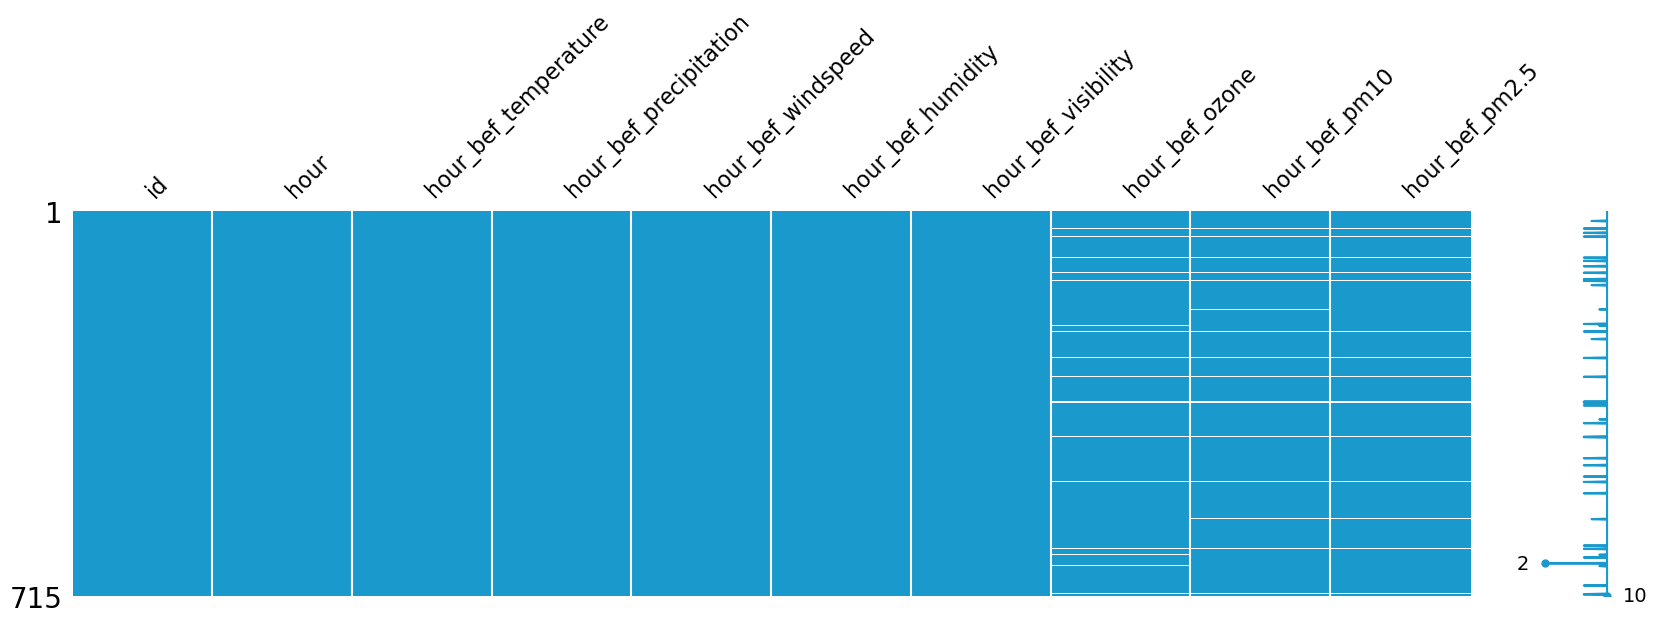

In [76]:
#test의 결측치 차트 시각화
msno.matrix(testtoshow, figsize=(20,5) ,color=(0.1, 0.6, 0.8))

<AxesSubplot:>

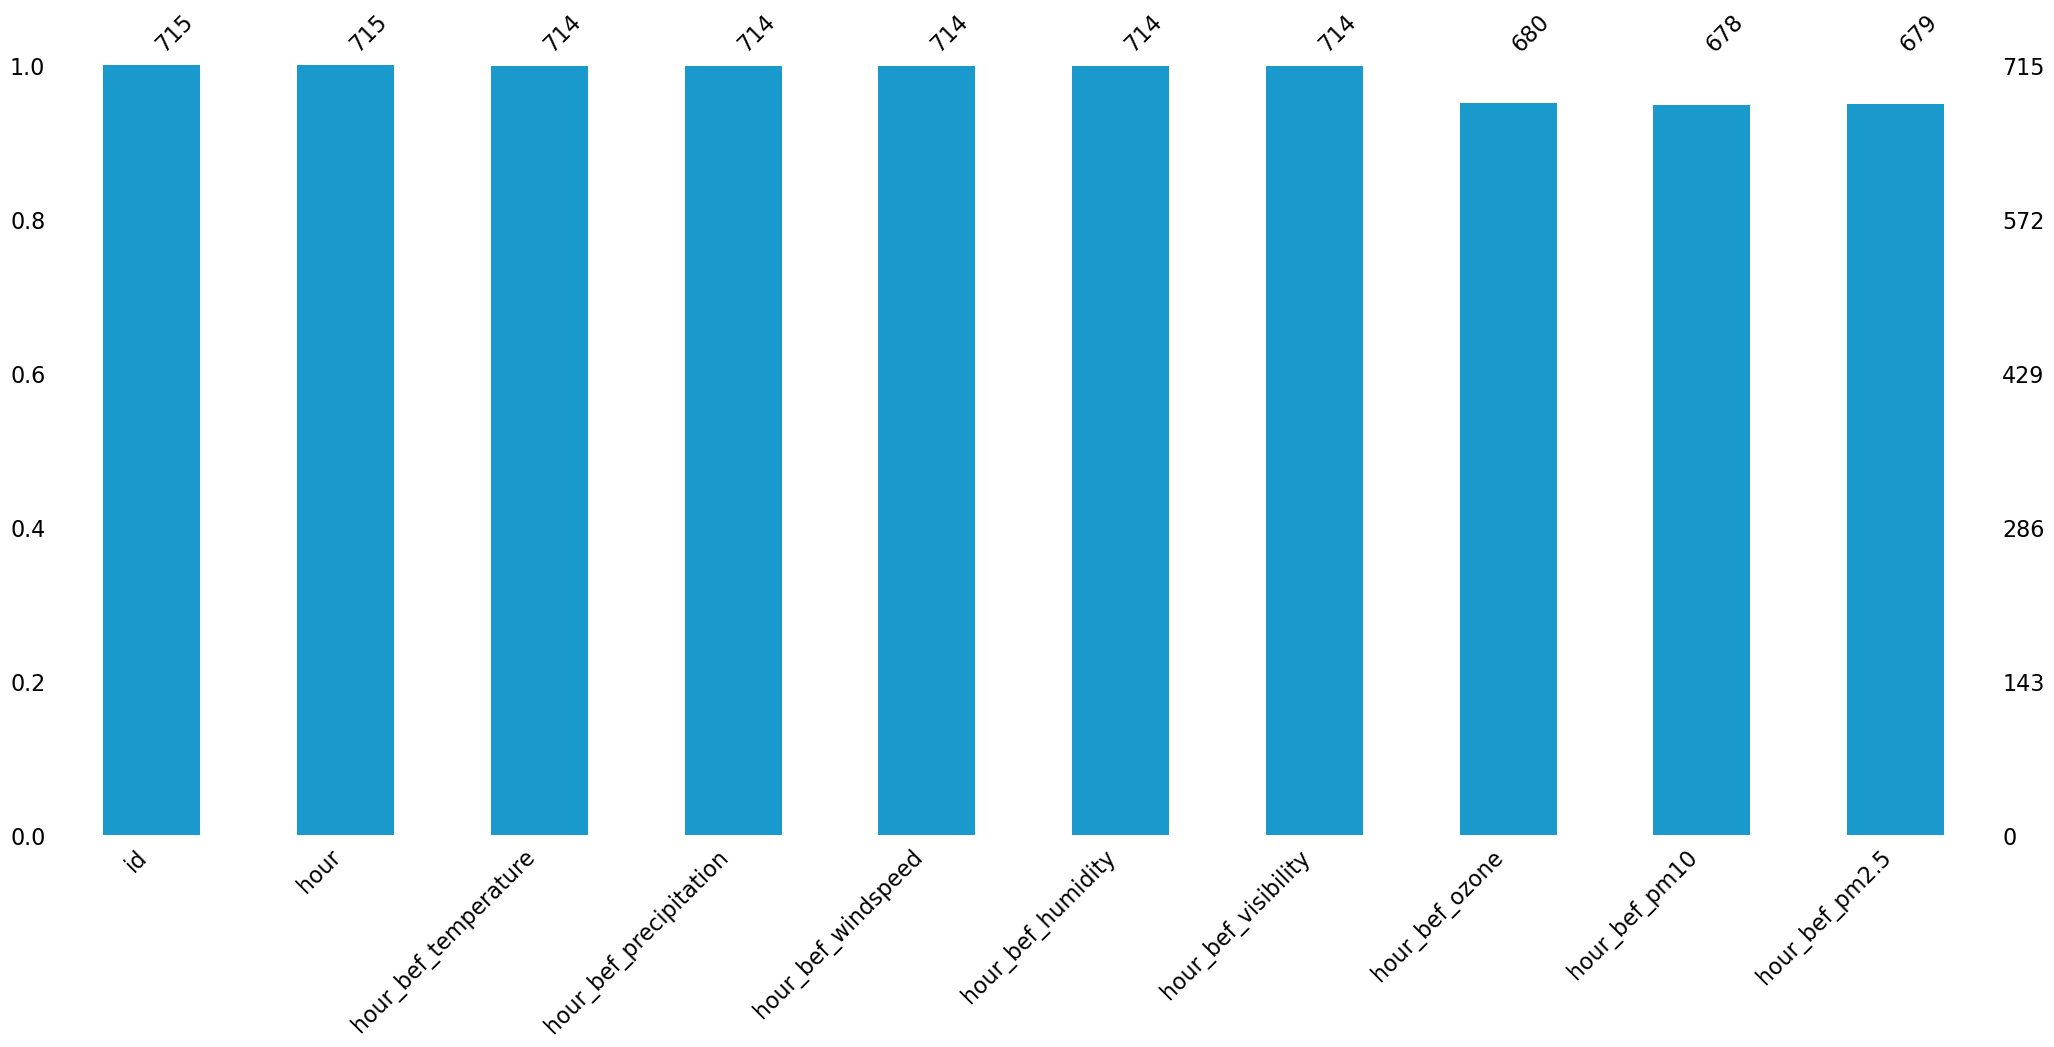

In [77]:
msno.bar(testtoshow,color=(0.1, 0.6, 0.8))

<AxesSubplot:>

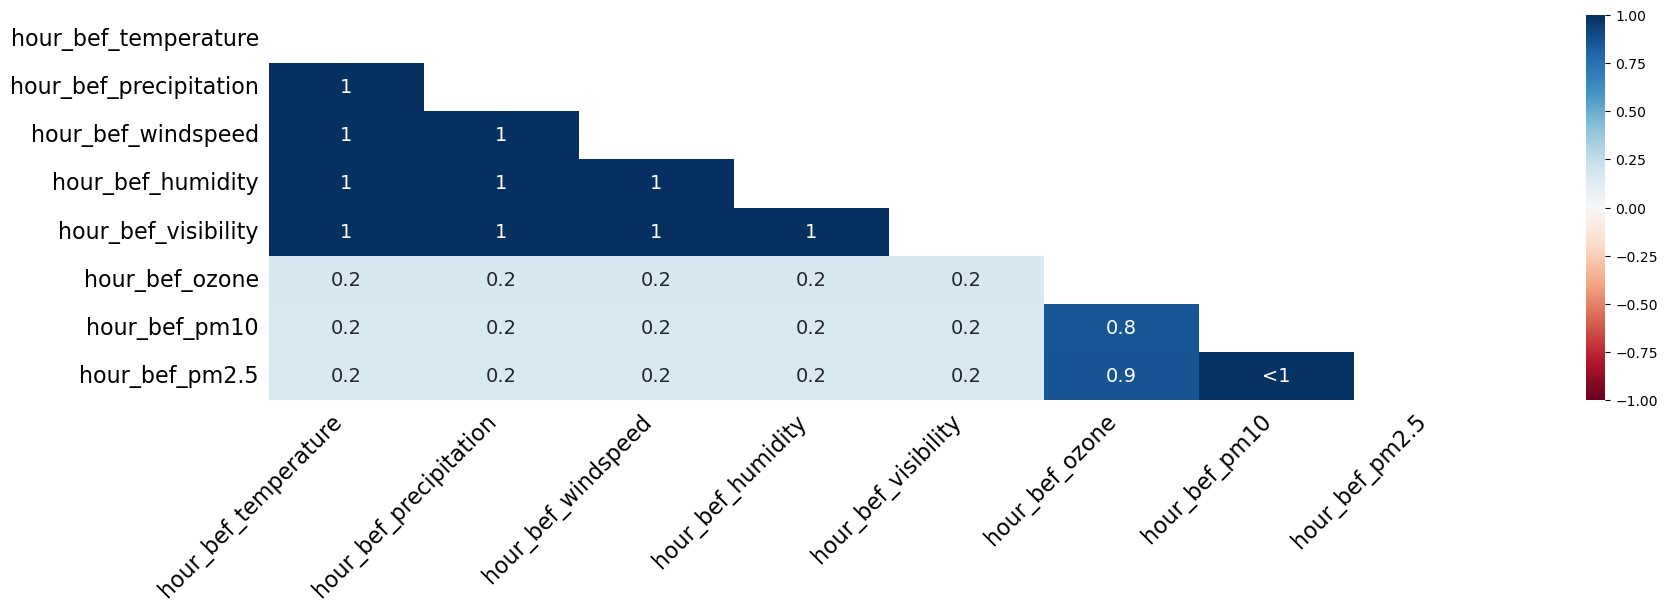

In [83]:
msno.heatmap(testtoshow, figsize=(20,5))

<AxesSubplot:>

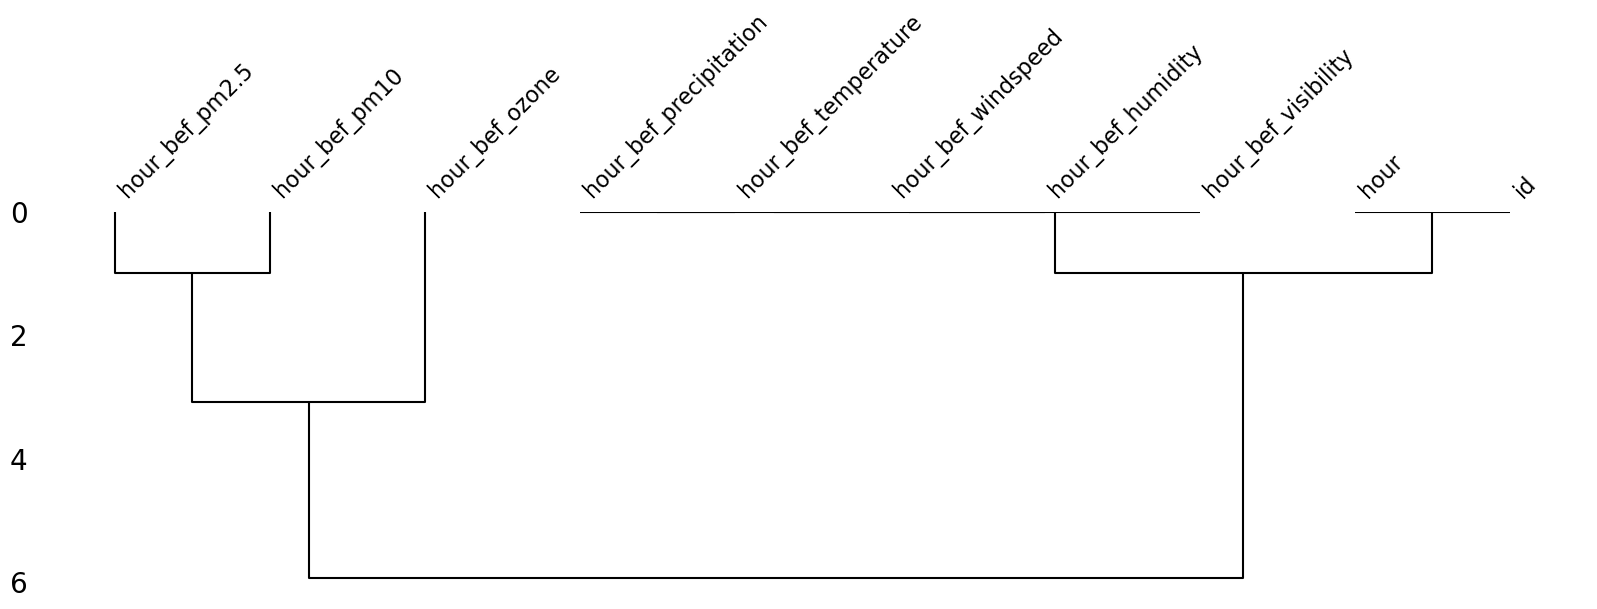

In [86]:
msno.dendrogram(testtoshow, figsize=(20,5))

<AxesSubplot:>

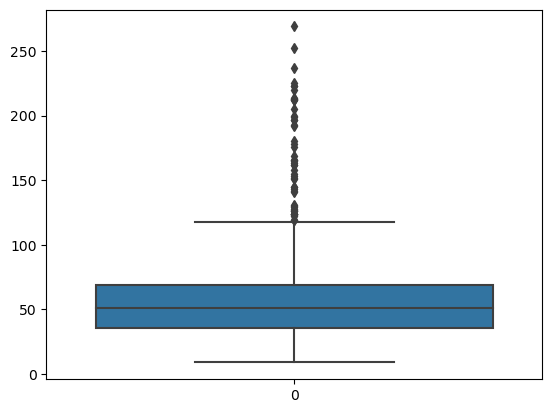

In [90]:
#박스플롯을 활용한 'hour_bef_pm10'피처 의 이상치 처리 과정
sns.boxplot(data=train['hour_bef_pm10'])

In [94]:
# 피처가 25%,75%인 값을 각 변수에 할당
quantile_25 = np.quantile(train['hour_bef_pm10'], 0.25)
quantile_75 = np.quantile(train['hour_bef_pm10'],0.75)

In [95]:
#둘의 차를 IQR변수에 할당
IQR = quantile_75 - quantile_25

In [99]:
#25%보다 1.5 * IQR 작은 값을 미니멈에, 75% 보다 IQR 큰값을 맥시멈에 넣어준다
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR

In [100]:
# train2에 피처가 미니멈보다 크고 맴시멈보다 작은 값들만 train2에 저장 합닌다.
train2 = train[(minimum <= train['hour_bef_pm10']) & (train['hour_bef_pm10'] <= maximum)]

In [101]:
#몇 개의 행이 되었는지 확인
train2.shape

(0, 11)

In [102]:
#1459개의 이상치를 발견해 제거 하였습니다.
train.shape[0] - train2.shape[0]

1459

<AxesSubplot:xlabel='hour_bef_pm10', ylabel='hour_bef_pm10'>

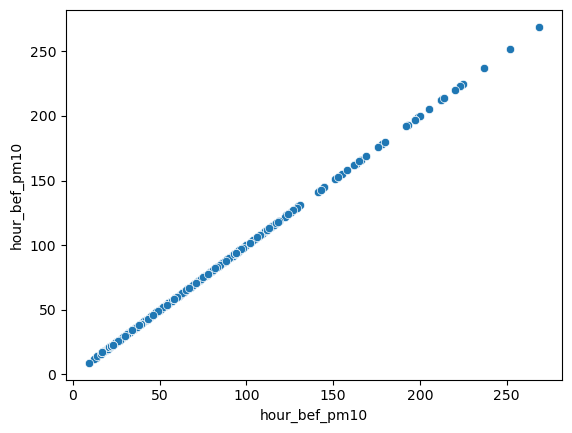

In [108]:
#산포도 그래프를 통해서 이상치를 쉽게 판별할 수 있습니다.
sns.scatterplot(data=train,x = 'hour_bef_pm10',y='hour_bef_pm10')

In [129]:
# 시간과 대여수 변수데이터의 시각화를 위해서 시간대별 평균 몇대의 따릉이가
# 대여되었는지 확인합니다.
train.groupby(['hour'])['count'].mean()

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

Text(16, 150, 'leave work')

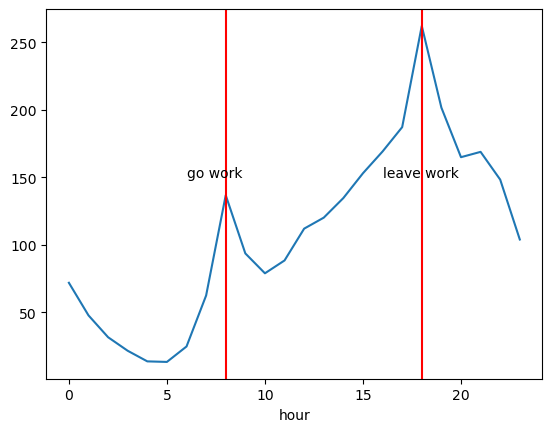

In [130]:
#이를 시각화 합니다.(일하러 가는 시간대와 퇴근하는 시간대에 대여량이 몰린것을
#확인할 수 있습니다.
train.groupby(['hour'])['count'].mean().plot()
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')
plt.text(6, 150, 'go work')
plt.text(16, 150, 'leave work')

In [132]:
#기온과 대여량의 상관관계를 살펴보았습니다.
train.groupby(['hour_bef_temperature'])['count'].mean()

hour_bef_temperature
3.1      14.0
3.2      21.0
3.3       7.0
4.0       8.0
4.2      16.0
        ...  
29.4    130.0
29.5    431.0
29.6    195.5
29.8    215.0
30.0    304.0
Name: count, Length: 245, dtype: float64

<AxesSubplot:xlabel='hour_bef_temperature'>

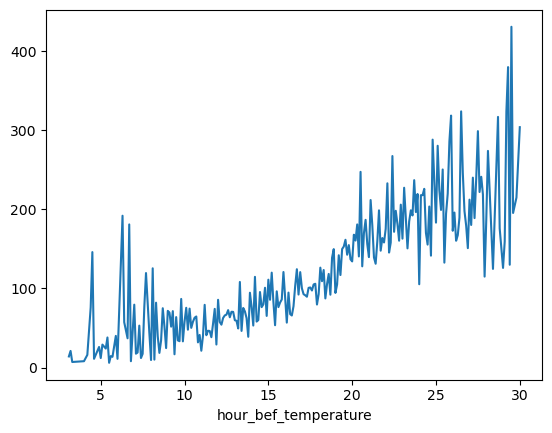

In [134]:
#추운날보다 따뜻한 날에 대여량이 현저히 높습니다.
train.groupby(['hour_bef_temperature'])['count'].mean().plot()

<AxesSubplot:xlabel='hour_bef_precipitation'>

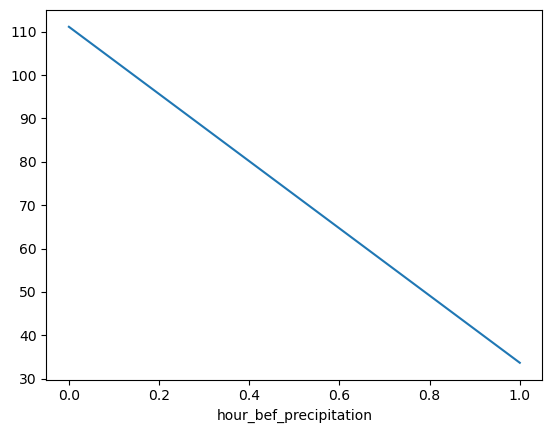

In [140]:
#비가 오지 않아 대여량이 많습니다
train.groupby(['hour_bef_precipitation'])['count'].mean().plot()

<AxesSubplot:xlabel='hour_bef_windspeed'>

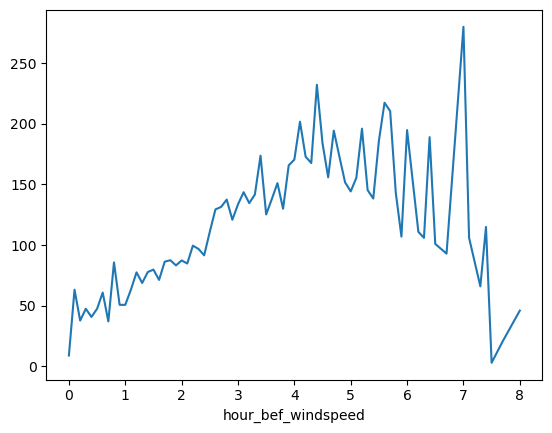

In [141]:
train.groupby(['hour_bef_windspeed'])['count'].mean().plot()

<AxesSubplot:xlabel='hour_bef_humidity'>

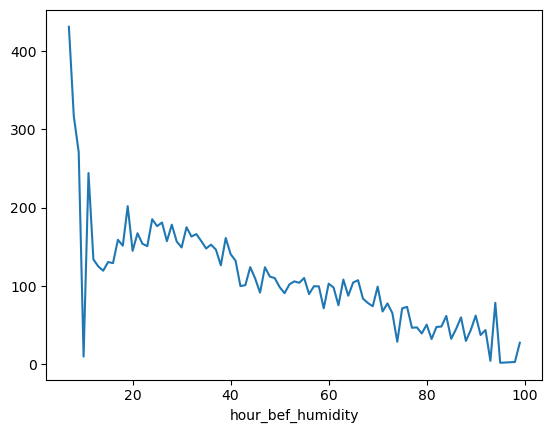

In [142]:
train.groupby(['hour_bef_humidity'])['count'].mean().plot()

<AxesSubplot:xlabel='hour_bef_visibility'>

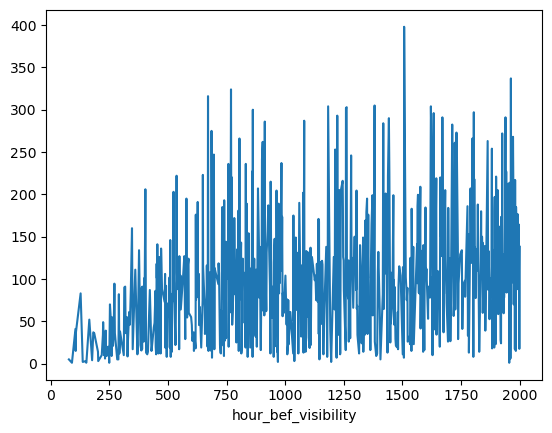

In [143]:
train.groupby(['hour_bef_visibility'])['count'].mean().plot()

<AxesSubplot:xlabel='hour_bef_ozone'>

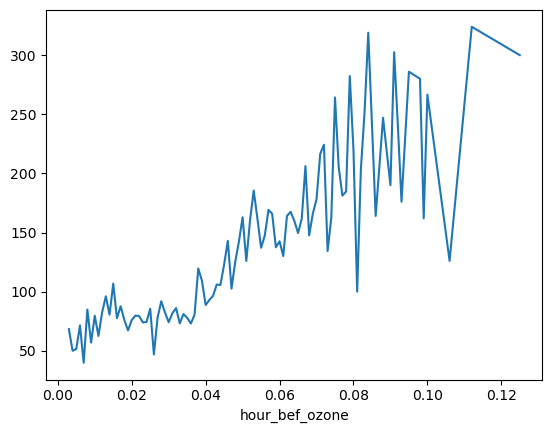

In [144]:
train.groupby(['hour_bef_ozone'])['count'].mean().plot()

<AxesSubplot:xlabel='hour_bef_visibility'>

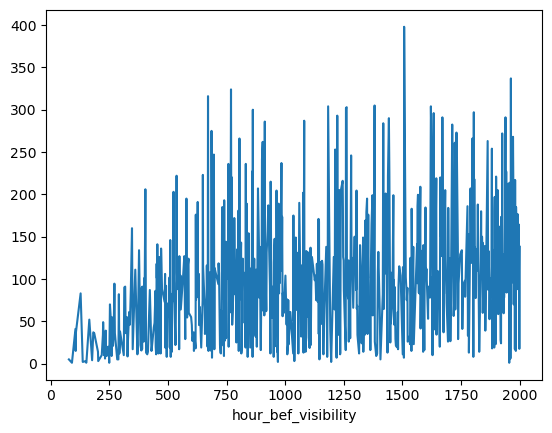

In [145]:
train.groupby(['hour_bef_visibility'])['count'].mean().plot()

<AxesSubplot:xlabel='hour_bef_pm10'>

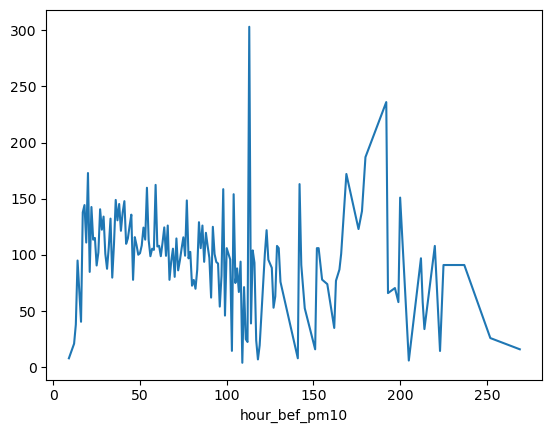

In [146]:
train.groupby(['hour_bef_pm10'])['count'].mean().plot()

<AxesSubplot:xlabel='hour_bef_pm2.5'>

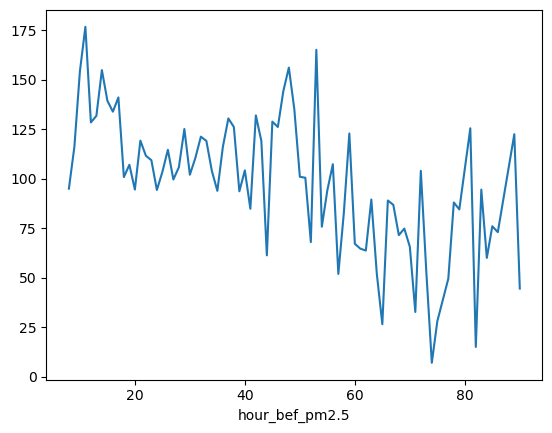

In [147]:
train.groupby(['hour_bef_pm2.5'])['count'].mean().plot()

<AxesSubplot:>

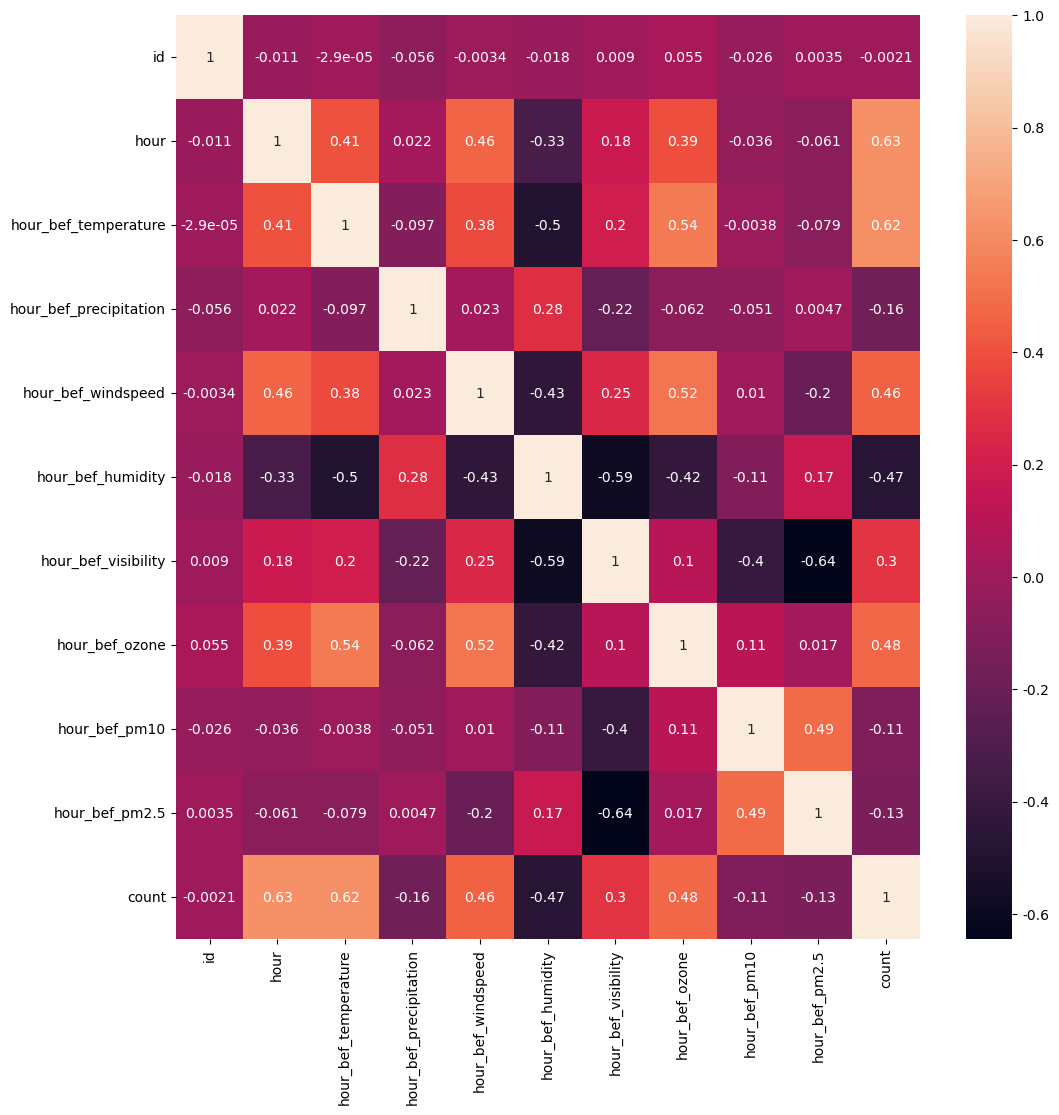

In [148]:
plt.figure(figsize =(12,12))
sns.heatmap(train.corr(),annot = True)

In [196]:
#연속형 변수를 범주형 변수로 변환(특징분할)
#시간 변수를 특정 범위에 따라 레이블 하여 시간대를 보기 편하도록 처리하였습니다.
def func(x):
    if x < 10 and x >=0:
        return 'morning'
    elif x < 14:
        return 'midday'
    elif x < 19:
        return 'afternoon'
    elif x > 19 and x <24:
        return 'evening' 

train['hour'] = train['hour'].apply(lambda x : func(x))

TypeError: '<' not supported between instances of 'str' and 'int'

In [197]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,evening,16.3,1.0,1.5,89.0,576.0,0.027,2.0,3.0,49.0
1,6,midday,20.1,0.0,1.4,48.0,916.0,0.042,2.0,3.0,159.0
2,7,morning,13.9,0.0,0.7,79.0,1382.0,0.033,0.0,1.0,26.0
3,8,evening,8.1,0.0,2.7,54.0,946.0,0.040,2.0,6.0,57.0
4,9,afternoon,29.5,0.0,4.8,7.0,2000.0,0.057,0.0,0.0,431.0


In [188]:
# 미세먼지의 경우 그 미세먼지의 강도를 직관적으로 알 수 있도록 0-10 사이로 범주화 하였습니다.
train['hour_bef_pm10'] = pd.cut(train['hour_bef_pm10'], 10, labels = False)
train['hour_bef_pm2.5'] = pd.cut(train['hour_bef_pm2.5'], 10, labels = False)

In [189]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,evening,16.3,1.0,1.5,89.0,576.0,0.027,2.0,3.0,49.0
1,6,midday,20.1,0.0,1.4,48.0,916.0,0.042,2.0,3.0,159.0
2,7,morning,13.9,0.0,0.7,79.0,1382.0,0.033,0.0,1.0,26.0
3,8,evening,8.1,0.0,2.7,54.0,946.0,0.040,2.0,6.0,57.0
4,9,afternoon,29.5,0.0,4.8,7.0,2000.0,0.057,0.0,0.0,431.0


In [212]:
#랜덤포레스트에 count변수를 제외한 뒤 학습 시켰습니다.
trainforRan.interpolate(inplace=True)
testforRan.fillna(0, inplace=True)
X_train = trainforRan.drop(['count'], axis=1)
Y_train = trainforRan['count']
model = RandomForestRegressor(criterion = 'mse')
model.fit(X_train, Y_train)


RandomForestRegressor(criterion='mse')

In [213]:
trainforRan.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [214]:
#모델의 특징 중요도를 
print(model.feature_importances_)
np.sort(model.feature_importances_)

[0.0266605  0.58747915 0.17814182 0.01851958 0.02668012 0.03955487
 0.03185401 0.03745832 0.03231964 0.021332  ]


array([0.01851958, 0.021332  , 0.0266605 , 0.02668012, 0.03185401,
       0.03231964, 0.03745832, 0.03955487, 0.17814182, 0.58747915])

In [216]:
#먼저 id와 count는 예측의 의미가 없으므로 drop 합니다. 그리고 차례로 모델의 특징
#중요도가 같은 순서대로 drop 하면서 밑의 과정을 반복하면 모델의 성능을 높일 수 있습니다.
X_train_1 = trainforRan.drop(['count','id'], axis=1)
test_1 = testforRan.drop(['id'], axis=1)
model_input_var1 = RandomForestRegressor(criterion = 'mse')
model_input_var1.fit(X_train_1, Y_train)
y_pred_1 = model_input_var1.predict(test_1)
submission_1 = pd.read_csv('data/submission.csv')
submission_1['count'] = y_pred_1
submission_1.to_csv('sub_1.csv',index=False)

In [247]:
#랜덤포레스트 그리드서치 모델최적화
train3

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [251]:
train3.interpolate(inplace=True)
test3.fillna(0, inplace=True)
X_train3 = train3.drop(['id', 'count'], axis = 1)
y_train3 = train3['count']
X_test3 = test3.drop('id', axis = 1)

In [252]:
X_train3.shape, y_train3.shape, X_test3.shape

((1459, 9), (1459,), (715, 9))

In [253]:
param = {'min_samples_split': [30, 50, 70],
        'max_depth': [5, 6, 7],
        'n_estimators': [50, 150, 250]}

In [254]:
gs = GridSearchCV(estimator=model, param_grid=param, scoring = 'neg_mean_squared_error', cv = 3)

In [255]:
gs

GridSearchCV(cv=3, estimator=RandomForestRegressor(criterion='mse'),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [257]:
gs.fit(X_train3, y_train3)

GridSearchCV(cv=3, estimator=RandomForestRegressor(criterion='mse'),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [259]:
submission['count'] = gs.predict(X_test3)

In [260]:
submission.to_csv('gridsearch.csv', index = False)

In [267]:
#최적화된 매개변수로 적용
gs.best_params_
d = gs.best_params_

In [268]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.152341,0.016802,0.003325,0.004703,5,30,50,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2129.942933,-1801.224853,-1784.912488,-1905.360092,158.943623,13
1,0.446627,0.016548,0.017826,0.001559,5,30,150,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2110.756732,-1804.754950,-1758.922014,-1891.477899,156.178465,11
2,0.713339,0.036257,0.029169,0.002922,5,30,250,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2091.394572,-1772.154621,-1755.015362,-1872.854852,154.689249,7
3,0.142368,0.009537,0.006968,0.004945,5,50,50,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2215.507254,-1858.729622,-1841.289127,-1971.842001,172.444405,18
4,0.444217,0.013211,0.021163,0.003917,5,50,150,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2169.800698,-1824.970786,-1786.171820,-1926.981101,172.428454,16
5,0.688989,0.032303,0.031233,0.002595,5,50,250,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2183.958615,-1856.952885,-1830.306938,-1957.072813,160.800864,17
6,0.141664,0.016719,0.005318,0.003847,5,70,50,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2313.432258,-1909.396935,-1865.355750,-2029.394981,201.647857,27
7,0.367463,0.026450,0.022193,0.006643,5,70,150,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2316.793121,-1915.418012,-1826.698456,-2019.636530,213.220262,26
8,0.625957,0.027281,0.035869,0.004750,5,70,250,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2279.650032,-1919.119166,-1855.601237,-2018.123478,186.736420,25
9,0.158303,0.003032,0.005334,0.003772,6,30,50,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-2081.317498,-1733.903826,-1732.821851,-1849.347725,164.027994,6


In [266]:
d = pd.DataFrame(gs.cv_results_)
d.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
18,0.172340,0.005283,0.007965,0.000021,7,30,50,"{'max_depth': 7, 'min_samples_split': 30, 'n_e...",-1988.825192,-1605.843446,-1741.832500,-1778.833713,158.525648,1
20,0.856562,0.076648,0.038665,0.002999,7,30,250,"{'max_depth': 7, 'min_samples_split': 30, 'n_e...",-1998.789282,-1637.875480,-1722.125172,-1786.263311,154.164347,2
19,0.534111,0.019123,0.026249,0.005229,7,30,150,"{'max_depth': 7, 'min_samples_split': 30, 'n_e...",-2006.982941,-1673.323796,-1727.502840,-1802.603192,146.201125,3
11,0.745837,0.056060,0.032313,0.013787,6,30,250,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-2029.618737,-1684.617868,-1711.221823,-1808.486143,156.741105,4
10,0.469519,0.014810,0.022963,0.003555,6,30,150,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-2045.292726,-1678.921865,-1743.353162,-1822.522584,159.703371,5
9,0.158303,0.003032,0.005334,0.003772,6,30,50,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-2081.317498,-1733.903826,-1732.821851,-1849.347725,164.027994,6
2,0.713339,0.036257,0.029169,0.002922,5,30,250,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2091.394572,-1772.154621,-1755.015362,-1872.854852,154.689249,7
22,0.503782,0.037503,0.020293,0.000491,7,50,150,"{'max_depth': 7, 'min_samples_split': 50, 'n_e...",-2096.534597,-1774.050653,-1770.499123,-1880.361458,152.864369,8
23,0.795491,0.022232,0.031610,0.001262,7,50,250,"{'max_depth': 7, 'min_samples_split': 50, 'n_e...",-2111.853330,-1762.059650,-1773.125417,-1882.346132,162.348962,9
21,0.162559,0.002828,0.008977,0.000814,7,50,50,"{'max_depth': 7, 'min_samples_split': 50, 'n_e...",-2120.514586,-1771.005777,-1777.846806,-1889.789057,163.171489,10


KeyError: 'rank_test_score'